In [226]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress
import requests
import json

In [414]:
path_to_excel = "Resource/ardd_fatal_crashes_feb2023.xlsx"
fatal_crashes_excel = pd.read_excel(path_to_excel,sheet_name=1)

path_to_csv = "Resource/ardd_fatalities.csv"
fatal_crashes_csv = pd.read_csv(path_to_csv,low_memory=False)

In [416]:
fatal_crashes_csv.drop(fatal_crashes_csv[fatal_crashes_csv['Year']==2023].index,inplace=True)

# Uncleaned Data
fatal_crashes_csv

,Crash ID,State,Month,Year,Dayweek,Time,Crash Type,Bus Involvement,Heavy Rigid Truck Involvement,Articulated Truck Involvement,...,Age,National Remoteness Areas,SA4 Name 2016,National LGA Name 2017,National Road Type,Christmas Period,Easter Period,Age Group,Day of week,Time of day
199,20225049,WA,12,2022,Sunday,18:48,Single,No,No,No,...,29,-9,-9,-9,-9,No,No,26_to_39,Weekend,Night
200,20225106,WA,12,2022,Sunday,1:12,Multiple,No,Yes,No,...,24,-9,-9,-9,-9,No,No,17_to_25,Weekend,Night
201,20221150,NSW,12,2022,Friday,22:30,Single,No,No,No,...,19,Inner Regional Australia,Murray,Greater Hume,Access road,No,No,17_to_25,Weekend,Night
202,20223161,Qld,12,2022,Sunday,3:00,Single,No,No,No,...,23,Outer Regional Australia,Cairns,Tablelands (R),National or State Highway,No,No,17_to_25,Weekend,Night
203,20224004,SA,12,2022,Saturday,1:30,Single,No,No,No,...,32,Inner Regional Australia,Adelaide - North,Playford (C),Sub-arterial Road,No,No,26_to_39,Weekend,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54519,19891246,NSW,1,1989,Wednesday,17:05,Single,Yes,-9,No,...,5,-9,-9,-9,-9,No,No,0_to_16,Weekday,Day
54520,19895088,WA,1,1989,Monday,6:00,Single,No,-9,No,...,19,-9,-9,-9,-9,Yes,No,17_to_25,Weekday,Day
54521,19895088,WA,1,1989,Monday,6:00,Single,No,-9,No,...,17,-9,-9,-9,-9,Yes,No,17_to_25,Weekday,Day
54522,19895088,WA,1,1989,Monday,6:00,Single,No,-9,No,...,17,-9,-9,-9,-9,Yes,No,17_to_25,Weekday,Day


In [418]:
# Create dataframe for each year 

def get_By_Year(y):
    df = fatal_crashes_csv.loc[fatal_crashes_csv['Year'] == y]
    return(df)

df_1989 = get_By_Year(1989)
df_1990 = get_By_Year(1990)
df_1991 = get_By_Year(1991)
df_1992 = get_By_Year(1992)
df_1993 = get_By_Year(1993)
df_1994 = get_By_Year(1994)
df_1995 = get_By_Year(1995)
df_1996 = get_By_Year(1996)
df_1997 = get_By_Year(1997)
df_1998 = get_By_Year(1998)
df_1999 = get_By_Year(1999)
df_2000 = get_By_Year(2000)
df_2001 = get_By_Year(2001)
df_2002 = get_By_Year(2002)
df_2003 = get_By_Year(2003)
df_2004 = get_By_Year(2004)
df_2005 = get_By_Year(2005)
df_2006 = get_By_Year(2006)
df_2007 = get_By_Year(2007)
df_2008 = get_By_Year(2008)
df_2009 = get_By_Year(2009)
df_2010 = get_By_Year(2010)
df_2011 = get_By_Year(2011)
df_2012 = get_By_Year(2012)
df_2013 = get_By_Year(2013)
df_2014 = get_By_Year(2014)
df_2015 = get_By_Year(2015)
df_2016 = get_By_Year(2016)
df_2017 = get_By_Year(2017)
df_2018 = get_By_Year(2018)
df_2019 = get_By_Year(2019)
df_2020 = get_By_Year(2020)
df_2021 = get_By_Year(2021)
df_2022 = get_By_Year(2022)


# Total crashes by state for all 34 years

df_34years_state_crashes = pd.DataFrame({'State':['ACT','NSW','NT','Qld','SA','Tas','Vic','WA'],'Crash':[0,0,0,0,0,0,0,0]}) 

# Function to get by state
def get_crash_by_state(df,for_year):
    temp = df.groupby('State')[['Crash ID']].count()
    temp.rename(columns = {'Crash ID':f'Crash_{for_year}'}, inplace=True)
    global df_34years_state_crashes 
    df_34years_state_crashes = pd.merge(df_34years_state_crashes,temp, on='State')
    return (df_last10years)
  

years_34 = {'1989':df_1989,'1990':df_1990,'1991':df_1991,'1992':df_1992,'1993':df_1993,'1994':df_1994,'1995':df_1995,
         '1996':df_1996,'1997':df_1997,'1998':df_1998,'1999':df_1999,'2000':df_2000,'2001':df_2001,'2002':df_2002,
         '2003':df_2003,'2004':df_2004,'2005':df_2005,'2006':df_2006,'2007':df_2007,'2008':df_2008,'2009':df_2009,
         '2010':df_2010,'2011':df_2011,'2012':df_2012,'2013':df_2013,'2014':df_2014,'2015':df_2015,'2016':df_2016,
         '2017':df_2017,'2018':df_2018,'2019':df_2019,'2020':df_2020,'2021':df_2021,'2022':df_2022
        }

for key,value in years_34.items():
    yrs.append(key)
    get_crash_by_state(value,key)
    
df_34years_state_crashes.drop(df_34years_state_crashes.columns[1],axis=1,inplace=True)
df_34years_state_crashes




,State,Crash_1989,Crash_1990,Crash_1991,Crash_1992,Crash_1993,Crash_1994,Crash_1995,Crash_1996,Crash_1997,...,Crash_2013,Crash_2014,Crash_2015,Crash_2016,Crash_2017,Crash_2018,Crash_2019,Crash_2020,Crash_2021,Crash_2022
0,ACT,32,26,17,20,12,17,15,23,17,...,7,10,15,10,5,9,6,7,11,18
1,NSW,959,797,663,649,581,646,620,581,576,...,333,307,350,380,389,347,353,284,275,293
2,NT,61,68,67,54,44,41,61,72,60,...,37,39,49,45,31,50,36,31,35,47
3,Qld,428,399,395,416,396,418,456,385,360,...,271,223,243,251,247,245,219,278,277,297
4,SA,222,226,184,165,218,159,181,181,148,...,98,108,102,86,100,80,114,93,99,71
5,Tas,80,71,77,74,58,59,57,64,32,...,36,33,34,37,32,32,29,38,35,51
6,Vic,776,548,503,396,435,377,418,417,377,...,243,248,252,290,259,213,266,211,231,242
7,WA,242,196,207,200,209,211,209,247,197,...,162,183,159,193,159,158,163,154,166,174


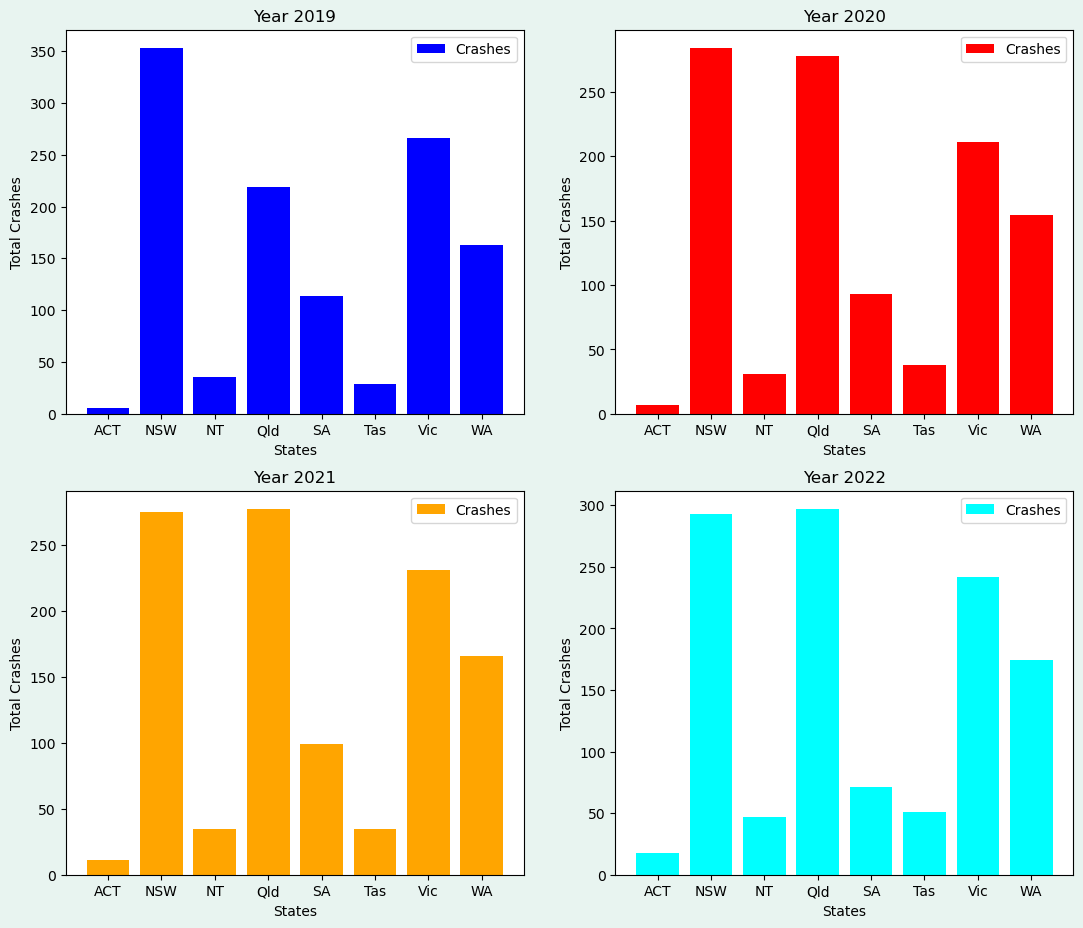

In [454]:
# Show 4 figures in in subplot

figure, axis = plt.subplots(2, 2,figsize=(13, 13),facecolor='#e8f4f0')

for ax in axis.flat:
    ax.set(xlabel='States', ylabel='Total Crashes')

axis[0, 0].bar(df_34years_state_crashes['State'],df_34years_state_crashes['Crash_2019'],color='b')
axis[0, 0].set_title("Year 2019")
axis[0, 0].legend(['Crashes'])


axis[0, 1].bar(df_34years_state_crashes['State'],df_34years_state_crashes['Crash_2020'],color='r')
axis[0, 1].set_title("Year 2020")
axis[0, 1].legend(['Crashes'])

axis[1, 0].bar(df_34years_state_crashes['State'],df_34years_state_crashes['Crash_2021'],color='orange')
axis[1, 0].set_title("Year 2021")
axis[1, 0].legend(['Crashes'])


axis[1, 1].bar(df_34years_state_crashes['State'],df_34years_state_crashes['Crash_2022'],color='cyan')
axis[1, 1].set_title("Year 2022")
axis[1, 1].legend(['Crashes'])
plt.subplots_adjust(top=0.75, bottom=0.10)


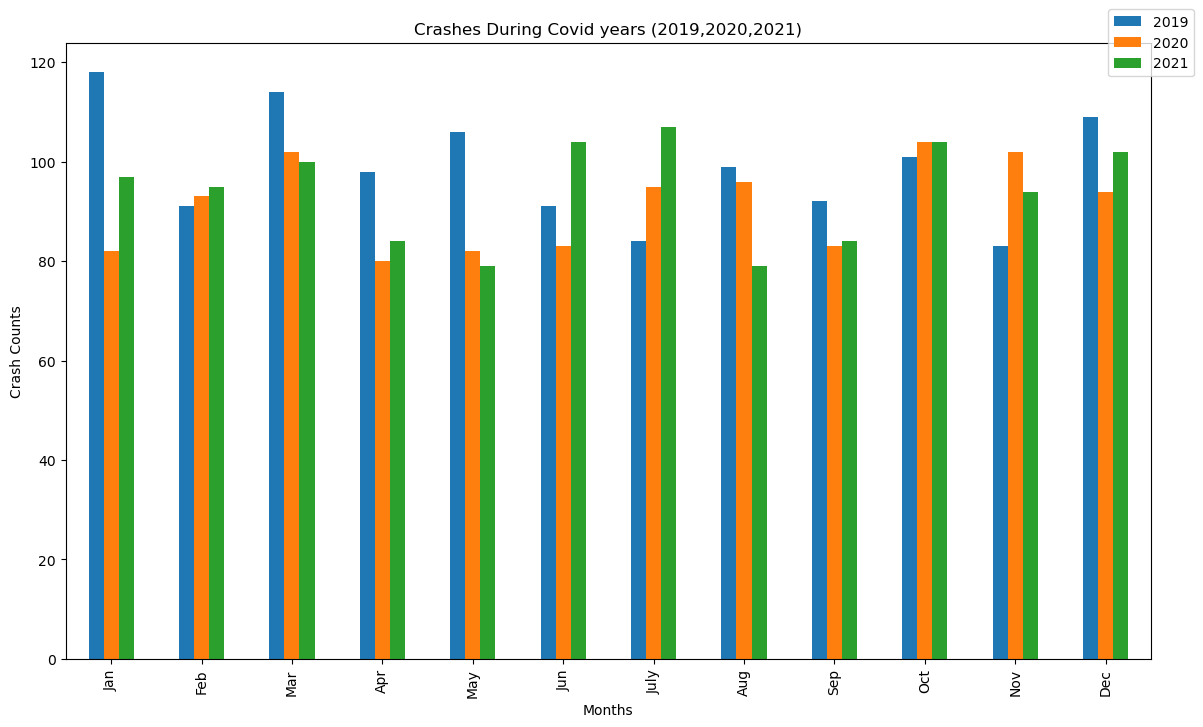

In [435]:
# Total crashes by month for year 2022,2021,2020,2019,2018

months = {"1":"Jan","2":"Feb","3":"Mar","4":"Apr","5":"May","6":"Jun","7":"July",
          "8":"Aug","9":"Sep","10":"Oct","11":"Nov","12":"Dec"}

# For 2022
df_2022_month = df_2022.groupby(['Month'])[['Crash ID']].count()
df_2022_month = df_2022_month.reset_index()
df_2022_month.rename(columns={'Crash ID':'2022'},inplace=True)


# For 2021

df_2021_month = df_2021.groupby(['Month'])[['Crash ID']].count()
df_2021_month = df_2021_month.reset_index()
df_2021_month.rename(columns={'Crash ID':'2021'},inplace=True)


# For 2020

df_2020_month = df_2020.groupby(['Month'])[['Crash ID']].count()
df_2020_month = df_2020_month.reset_index()
df_2020_month.rename(columns={'Crash ID':'2020'},inplace=True)


# For 2019

df_2019_month = df_2019.groupby(['Month'])[['Crash ID']].count()
df_2019_month = df_2019_month.reset_index()
df_2019_month.rename(columns={'Crash ID':'2019'},inplace=True)


# For 2018

df_2018_month = df_2018.groupby(['Month'])[['Crash ID']].count()
df_2018_month = df_2018_month.reset_index()
df_2018_month.rename(columns={'Crash ID':'2018'},inplace=True)


for key,value in months.items():
    df_2022_month['Month'] = df_2022_month['Month'].replace([int(key)],value)
    df_2021_month['Month'] = df_2021_month['Month'].replace([int(key)],value)
    df_2020_month['Month'] = df_2020_month['Month'].replace([int(key)],value)
    df_2019_month['Month'] = df_2019_month['Month'].replace([int(key)],value)
    df_2018_month['Month'] = df_2018_month['Month'].replace([int(key)],value)


combined_crashes_month = pd.merge(df_2020_month,(pd.merge(df_2018_month,df_2019_month,on="Month")),on="Month")
combined_crashes_month = pd.merge(combined_crashes_month,(pd.merge(df_2021_month,df_2022_month,on="Month")),on="Month")
combined_crashes_month


crashes_during_lockdown = pd.merge(df_2021_month,(pd.merge(df_2020_month,df_2019_month,on="Month")),on="Month")
crashes_during_lockdown.plot(x="Month",y=['2019','2020','2021'],kind='bar',figsize=(14,8))
plt.title("Crashes During Covid years (2019,2020,2021)")
plt.xlabel("Months")
plt.ylabel("Crash Counts")
plt.legend(bbox_to_anchor=(1.0, 1.0),loc="center")
plt.show()





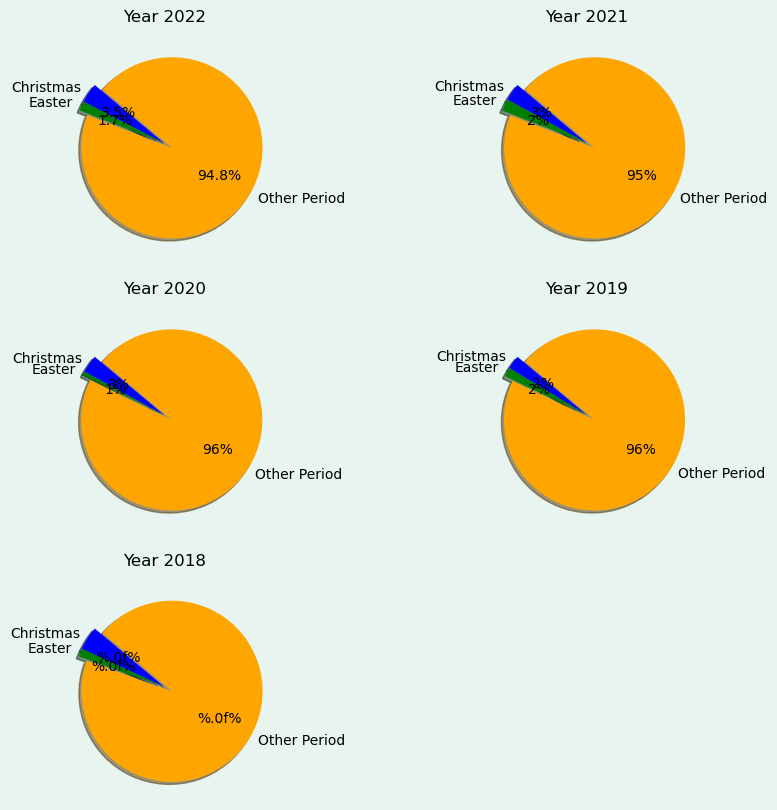

In [465]:
figure, axis = plt.subplots(3, 2,figsize=(10, 10),facecolor='#e8f4f0')
figure.delaxes(ax= axis[2,1])
colours = ["blue","green","orange"]
explode = (0,0,0.1)
pie_label = ['Christmas','Easter','Other Period'] 

# For 2022

# Clean the Data
df_2022_onChris = df_2022.loc[df_2022['Christmas Period']=='Yes']
df_2022_onEaster = df_2022.loc[df_2022['Easter Period']=='Yes']
df_2022_ordDay = df_2022.loc[(df_2022['Christmas Period']=='No') & (df_2022['Easter Period']=='No')]

# Tell matplotlib to create a pie chart based upon the above data
pie_values = [df_2022_onChris['Crash ID'].count(),df_2022_onEaster['Crash ID'].count(),df_2022_ordDay['Crash ID'].count()]
axis[0, 0].pie(pie_values, explode=explode, labels=pie_label, colors=colours,autopct="%1.1f%%", shadow=True, startangle=140)
axis[0, 0].set_title("Year 2022")


# For 2021

# Clean the Data
df_2021_onChris = df_2021.loc[df_2021['Christmas Period']=='Yes']
df_2021_onEaster = df_2021.loc[df_2021['Easter Period']=='Yes']
df_2021_ordDay = df_2021.loc[(df_2021['Christmas Period']=='No') & (df_2021['Easter Period']=='No')]

#Tell matplotlib to create a pie chart based upon the above data
pie_values = [df_2021_onChris['Crash ID'].count(),df_2021_onEaster['Crash ID'].count(),df_2021_ordDay['Crash ID'].count()]
axis[0, 1].pie(pie_values, explode=explode, labels=pie_label, colors=colours,autopct="%.0f%%", shadow=True, startangle=140)
axis[0, 1].set_title("Year 2021")


# For 2020

# Clean the Data
df_2020_onChris = df_2020.loc[df_2020['Christmas Period']=='Yes']
df_2020_onEaster = df_2020.loc[df_2020['Easter Period']=='Yes']
df_2020_ordDay = df_2020.loc[(df_2020['Christmas Period']=='No') & (df_2020['Easter Period']=='No')]

# Tell matplotlib to create a pie chart based upon the above data
pie_values = [df_2020_onChris['Crash ID'].count(),df_2020_onEaster['Crash ID'].count(),df_2020_ordDay['Crash ID'].count()]
axis[1, 0].pie(pie_values, explode=explode, labels=pie_label, colors=colours,autopct="%.0f%%", shadow=True, startangle=140)
axis[1, 0].set_title("Year 2020")


# For 2019

# Clean the Data
df_2019_onChris = df_2019.loc[df_2019['Christmas Period']=='Yes']
df_2019_onEaster = df_2019.loc[df_2019['Easter Period']=='Yes']
df_2019_ordDay = df_2019.loc[(df_2019['Christmas Period']=='No') & (df_2019['Easter Period']=='No')]

pie_values = [df_2019_onChris['Crash ID'].count(),df_2019_onEaster['Crash ID'].count(),df_2019_ordDay['Crash ID'].count()]
axis[1, 1].pie(pie_values, explode=explode, labels=pie_label, colors=colours,autopct="%.0f%%", shadow=True, startangle=140)
axis[1, 1].set_title("Year 2019")


# For 2018

# Clean the Data
df_2018_onChris = df_2018.loc[df_2018['Christmas Period']=='Yes']
df_2018_onEaster = df_2018.loc[df_2018['Easter Period']=='Yes']
df_2018_ordDay = df_2018.loc[(df_2018['Christmas Period']=='No') & (df_2018['Easter Period']=='No')]

pie_values = [df_2018_onChris['Crash ID'].count(),df_2018_onEaster['Crash ID'].count(),df_2018_ordDay['Crash ID'].count()]
axis[2, 0].pie(pie_values, explode=explode, labels=pie_label, colors=colours,autopct="%%.0f%%", shadow=True, startangle=140)
axis[2, 0].set_title("Year 2018")

plt.show()



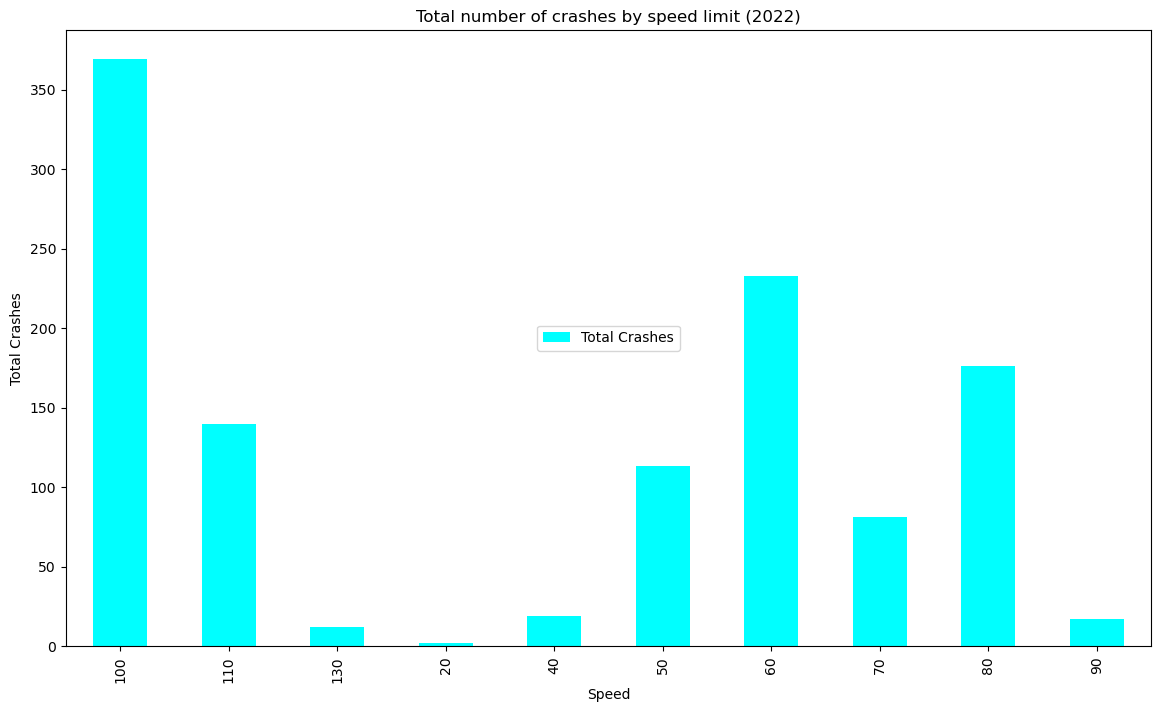

In [436]:
df_2022_speed = df_2022.loc[df_2022['Speed Limit'] != '-9']
df_2022_speed = df_2022_speed.groupby('Speed Limit')[['Crash ID']].count()
df_2022_speed = df_2022_speed.reset_index()

df_2022_speed.plot(x="Speed Limit",y=['Crash ID'],kind='bar',figsize=(14,8),color='aqua')
plt.title("Total number of crashes by speed limit (2022)")
plt.xlabel("Speed")
plt.ylabel("Total Crashes")
plt.legend(['Total Crashes'],loc="center")
plt.show()




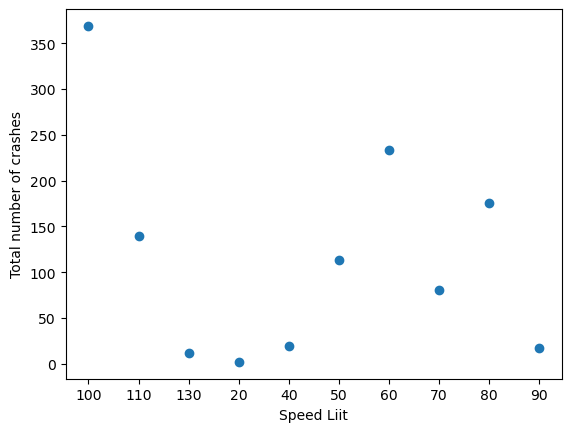

In [464]:
df_2022_speed_reg = df_2022.loc[df_2022['Speed Limit'] != '-9']
crashes_by_speed = {'crash_count':[],'speed':[]}
crashes_by_speed['speed'] = df_2022_speed_reg['Speed Limit'].unique()

df_2022_speed = df_2022.loc[df_2022['Speed Limit'] != '-9']
df_2022_speed = df_2022_speed.groupby('Speed Limit')[['Crash ID']].count()
df_2022_speed = df_2022_speed.reset_index()

x_values = df_2022_speed['Speed Limit']
y_values = df_2022_speed['Crash ID']
plt.xlabel('Speed Limit')
plt.ylabel('Total number of crashes')
plt.scatter(x_values,y_values)
plt.show()

# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# #regress_values = x_values * slope + intercept
# #line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# #plt.plot(x_values,regress_values,"r-")
# #plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")


## Things to do
    * Crashes Vs Age groups. Which age group is more prone to accidents ?
        * Linear Regression 
    * Crashes Vs Day of the week . Weekend mindset influence on crashes ?
        * Linear regression crashes vs weekend
    * Impact of heavy/Articulat truck in crashes ?
    * Which part of the day records most accidents ? Day or Night ?
    * Does road type impact accidents ? (Local/National/State Highways)
    * Impact of Remoteness (Major ciities,outer & inner australian regions) on crashes ?
    
    * Predictions for estimated crashes in the year 2024 & 2025
    
    
    